I imported required libraries.

In [269]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

Then I insert all the required connection properties, to be able to create connection between AdventureWorks201 database and jupyter.

In [270]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      r'Server=DESKTOP-E4OMLGL\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

What is the relationship between Country and Revenue?
To answer this question I imported Country and TotalRevenue from sales.totalrevenue_by_country View.


In [271]:
totalrevenue_by_country = pd.read_sql_query('SELECT Country, TotalRevenue FROM sales.totalrevenue_by_country', conn)
totalrevenue_by_country.sort_values(by=['TotalRevenue'], inplace=True, ascending=True)


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_13552\1339872706.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  totalrevenue_by_country = pd.read_sql_query('SELECT Country, TotalRevenue FROM sales.totalrevenue_by_country', conn)


Let's get a preview of what our data looks like:

In [272]:
print(totalrevenue_by_country.head())

          Country  TotalRevenue
2         Germany     5900000.0
0       Australia     6420000.0
3          France     6650000.0
4  United Kingdom     6800000.0
1          Canada    18040000.0


Visualisation of Country Vs Total Revenue

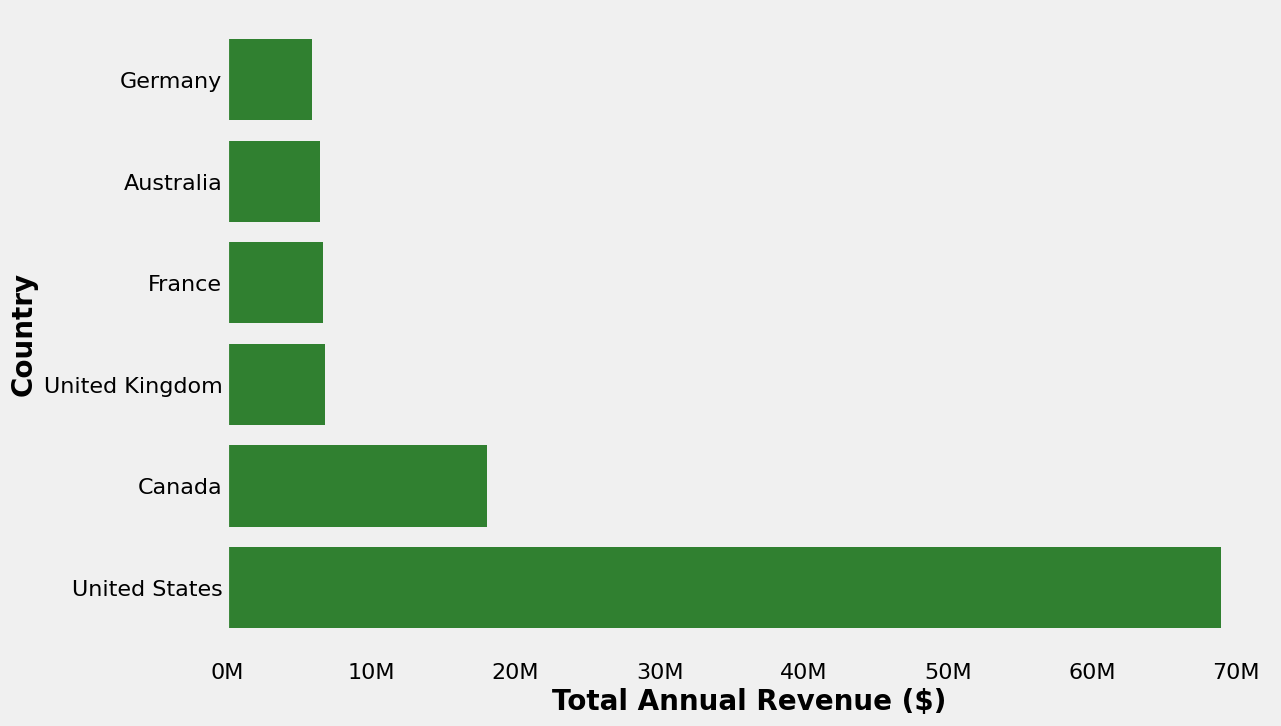

In [273]:
# Convert revenue to millions for readability
totalrevenue_by_country['TotalRevenue_mil'] = totalrevenue_by_country['TotalRevenue'] / 1e6

# Sort DataFrame by TotalRevenue in descending order
totalrevenue_by_country = totalrevenue_by_country.sort_values(by='TotalRevenue', ascending=False)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar chart
country_revenue2 = ax.barh(
    totalrevenue_by_country['Country'], 
    totalrevenue_by_country['TotalRevenue_mil'], 
    color='darkgreen', alpha=0.8
)

# Set explicit x and y axes
ax.set_xlabel('Total Annual Revenue ($)', fontsize=20, fontweight='bold')
ax.set_ylabel('Country', fontsize=20, fontweight='bold')

# Customize tick marks
ax.set_xticks(range(0, 80, 10))
ax.set_xticklabels(['0M', '10M', '20M', '30M', '40M', '50M', '60M', '70M'])
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)



# Style and grid settings
plt.style.use('fivethirtyeight')
ax.grid(False)

# Save and show the figure
fig.savefig('Country_vs_Total_Annual_Revenue.png', bbox_inches='tight')
plt.show()

In [274]:
avgrevenue_by_country = pd.read_sql_query('SELECT Country, avgRevenue FROM sales.avgrevenue_by_country', conn)
avgrevenue_by_country.sort_values(by=['avgRevenue'], inplace=True, ascending=True)


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_13552\2481499533.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avgrevenue_by_country = pd.read_sql_query('SELECT Country, avgRevenue FROM sales.avgrevenue_by_country', conn)


In [275]:
print(avgrevenue_by_country.head())

         Country   avgRevenue
2        Germany  147500.0000
1         Canada  156869.5652
5  United States  157848.9702
0      Australia  160500.0000
3         France  166250.0000


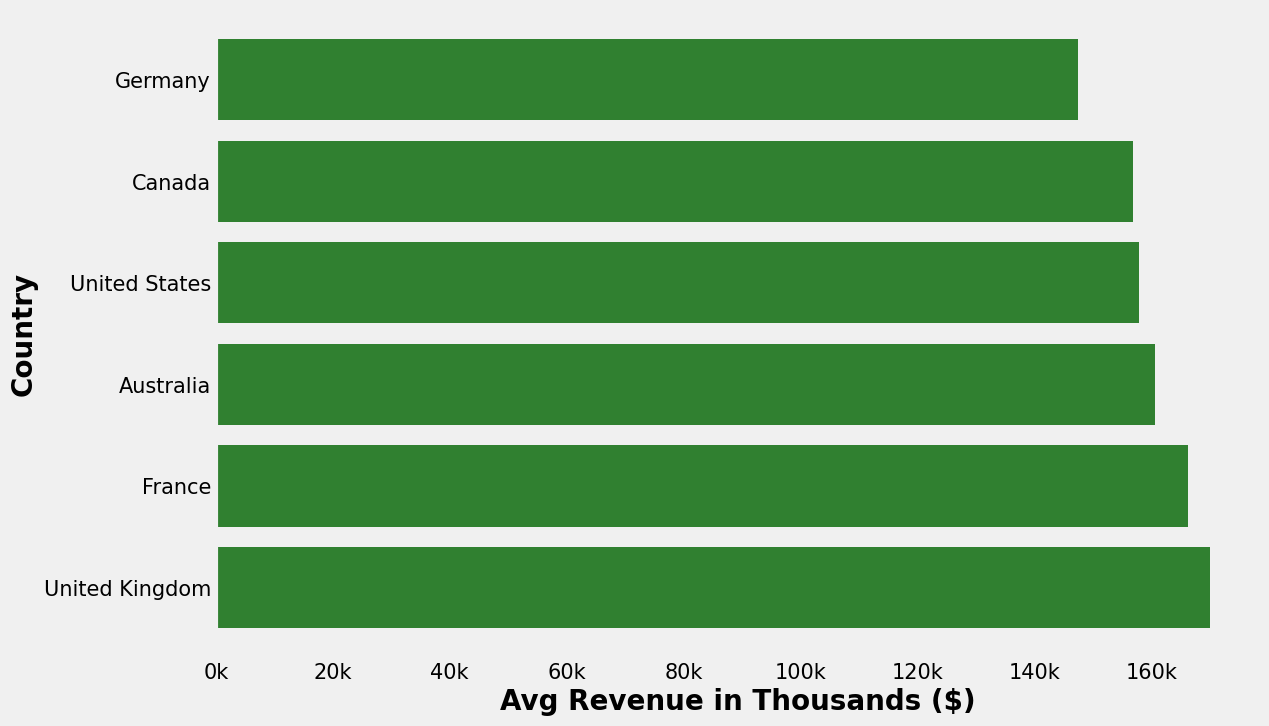

In [276]:
# Convert revenue to thousands for readability
avgrevenue_by_country['avgRevenue_thousands'] = avgrevenue_by_country['avgRevenue'] 

# Sort DataFrame by TotalRevenue in descending order
avgrevenue_by_country = avgrevenue_by_country.sort_values(by='avgRevenue', ascending=False)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar chart
country_revenue3 = ax.barh(
    avgrevenue_by_country['Country'], 
    avgrevenue_by_country['avgRevenue_thousands'], 
    color='darkgreen', alpha=0.8
)

# Set explicit x and y axes
ax.set_xlabel('AVG Revenue (Thousands $)', fontsize=20)
ax.set_ylabel('Country', fontsize=20, fontweight='bold')

plt.xticks([0,20000,40000,60000,80000,100000,120000,140000,160000],['0k','20k','40k','60k','80k','100k','120k','140k','160k'],fontsize=15)

plt.xlabel('Avg Revenue in Thousands ($)',fontsize=20,fontweight='bold')

# Customize tick sizes for better readability
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


# Style and grid settings
plt.style.use('fivethirtyeight')
ax.grid(False)

# Save and show the figure
fig.savefig('Country_vs_AVG_Revenue_Thousands.png', bbox_inches='tight')
plt.show()

Now I create the cursor

In [277]:
cursor = conn.cursor()

In [278]:
query = 'select cr.name as country, year(soh.orderdate) as year, sum(soh.totaldue) as total_revenue from sales.salesorderheader as soh join sales.salesterritory as st on soh.territoryid = st.territoryid join person.countryregion as cr on st.countryregioncode = cr.countryregioncode group by cr.name, year(soh.orderdate) order by year asc, total_revenue desc;'


In [279]:
df = pd.read_sql(query, conn)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_13552\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Let's get a preview of what our data looks like:

In [280]:
print(df.head())

          country  year  total_revenue
0   United States  2011   9.445719e+06
1          Canada  2011   2.106906e+06
2       Australia  2011   1.693033e+06
3  United Kingdom  2011   4.009919e+05
4         Germany  2011   2.727809e+05


Lastly, I created a stacked bar chart to show what percentage of the total revenue each country's revenue contributes in that year.

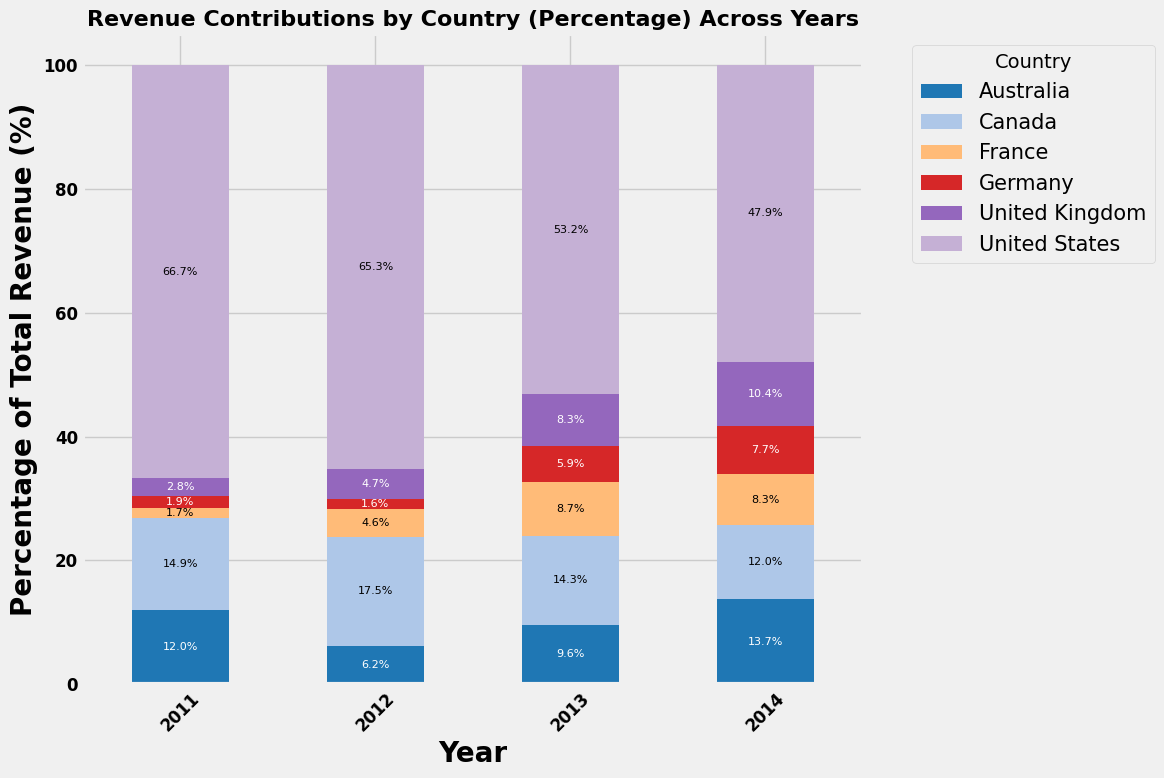

In [281]:

# Pivot the dataframe for visualization
pivot_df = df.pivot(index="year", columns="country", values="total_revenue")

# Normalize the data to percentages for each year
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Define the exact custom colormap based on the uploaded image
from matplotlib.colors import ListedColormap
exact_colormap = ListedColormap([
    '#1f77b4',  # Dark Blue
    '#aec7e8',  # Light Blue
    '#ff7f0e',  # Orange
    '#ffbb78',  # Light Orange
    '#d62728',  # Red
    '#ff9896',  # Light Red
    '#9467bd',  # Purple
    '#c5b0d5'   # Light Purple
])

# Plotting the stacked bar chart with percentages
ax = percent_df.plot(kind="bar", stacked=True, figsize=(12, 8), colormap=exact_colormap)

# Customizing the plot
plt.title("Revenue Contributions by Country (Percentage) Across Years", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=20, fontweight="bold")
plt.ylabel("Percentage of Total Revenue (%)", fontsize=20, fontweight="bold")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=15)

# Adding percentage labels on each portion of the bars with better contrast
for bars in ax.patches:
    # Extract bar dimensions
    height = bars.get_height()
    width = bars.get_width()
    x = bars.get_x()
    y = bars.get_y()
    
    if height > 0:  # Only label non-zero portions
        # Decide label color based on contrast with the bar color
        bar_color = bars.get_facecolor()
        brightness = (bar_color[0] * 0.299 + bar_color[1] * 0.587 + bar_color[2] * 0.114)
        text_color = "white" if brightness < 0.5 else "black"
        
        ax.text(
            x + width / 2, 
            y + height / 2, 
            f"{height:.1f}%",  # Format as percentage
            ha="center", 
            va="center", 
            fontsize=8, 
            color=text_color
        )

# Adjust layout for better readability
plt.xticks(fontsize=12, rotation=45, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.tight_layout()

# Display the plot
plt.show()


To answer this question I imported country, year, anual_revenue from Sales.revenue_by_country_year View, to be able to copmpare different countries trends annual revenue trends over the years.

In [282]:
anualrevenue_by_yaer = pd.read_sql_query('SELECT country, year, anual_revenue FROM Sales.revenue_by_country_year', conn)
anualrevenue_by_yaer.sort_values(by=['year'], inplace=True, ascending=True)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_13552\3881139370.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  anualrevenue_by_yaer = pd.read_sql_query('SELECT country, year, anual_revenue FROM Sales.revenue_by_country_year', conn)


In [283]:
print(anualrevenue_by_yaer)

           country  year  anual_revenue
0        Australia  2011   1.693033e+06
4           Canada  2011   2.106906e+06
12          France  2011   2.362686e+05
8          Germany  2011   2.727809e+05
20   United States  2011   9.445719e+06
16  United Kingdom  2011   4.009919e+05
9          Germany  2012   6.078282e+05
13          France  2012   1.743488e+06
17  United Kingdom  2012   1.769769e+06
21   United States  2012   2.460676e+07
5           Canada  2012   6.599971e+06
1        Australia  2012   2.347885e+06
14          France  2013   4.271019e+06
10         Germany  2013   2.869492e+06
2        Australia  2013   4.702404e+06
6           Canada  2013   7.010450e+06
22   United States  2013   2.604434e+07
18  United Kingdom  2013   4.068179e+06
3        Australia  2014   3.071054e+06
7           Canada  2014   2.681603e+06
15          France  2014   1.868974e+06
11         Germany  2014   1.729719e+06
19  United Kingdom  2014   2.335109e+06
23   United States  2014   1.073304e+07


In [284]:
print(anualrevenue_by_yaer.head())

          country  year  anual_revenue
0       Australia  2011   1.693033e+06
4          Canada  2011   2.106906e+06
12         France  2011   2.362686e+05
8         Germany  2011   2.727809e+05
20  United States  2011   9.445719e+06


I created line charts of annual revenue for any country over the yeras to compare their trends.  

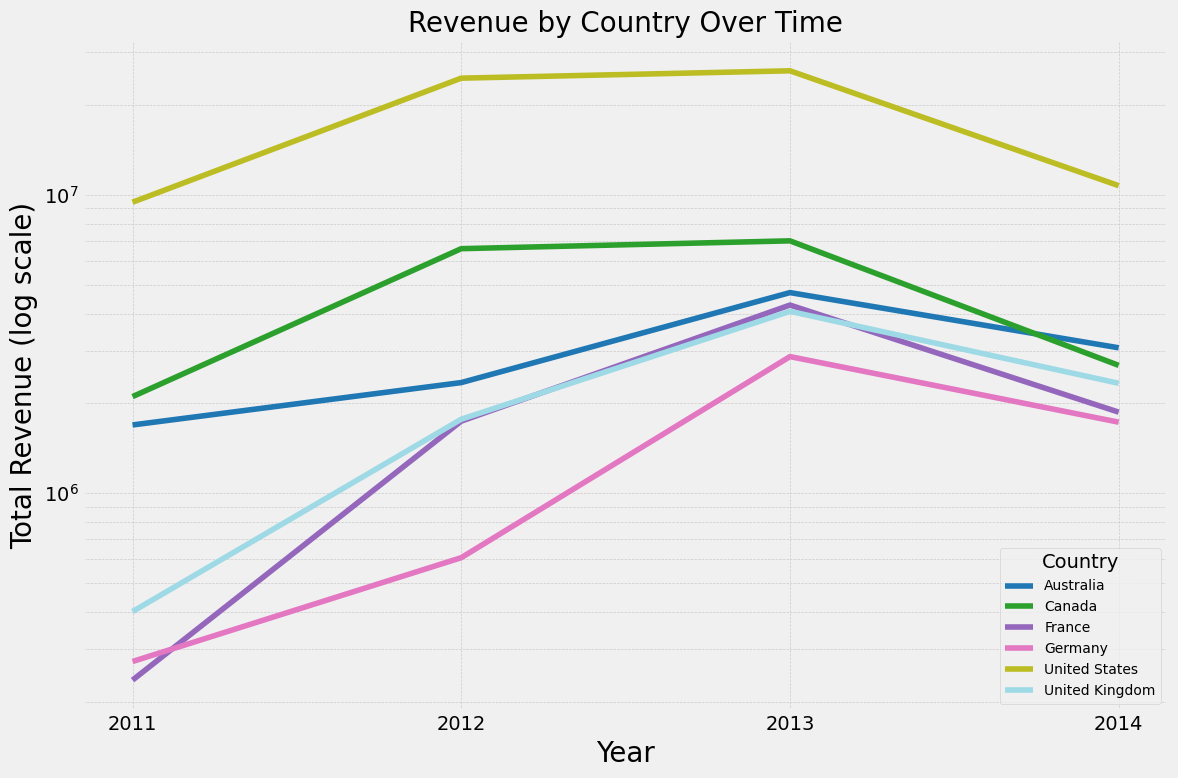

In [285]:
# Create the visualization
plt.figure(figsize=(12, 8))
countries = anualrevenue_by_yaer['country'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))  # Use different colors for countries

for country, color in zip(countries, colors):
    country_data = anualrevenue_by_yaer[anualrevenue_by_yaer['country'] == country]
    plt.plot(country_data['year'], country_data['anual_revenue'], label=country, color=color)

# Logarithmic scale for the y-axis
plt.yscale('log')

# Add title and labels
plt.title('Revenue by Country Over Time', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Revenue (log scale)', fontsize=20)
plt.xticks(sorted(anualrevenue_by_yaer['year'].unique()))  # Ensure years are ordered correctly
plt.legend(title='Country', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()